# Thông tin sinh viên
- Họ và tên: Nguyễn Thị Như Vân
- MSSV: 20520855
- Bài tập 3: 11/11/2023

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import os
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dir_monhoc = '/gdrive/MyDrive/UIT/CS406.O11.KHCL'
dir_baitap = os.path.join(dir_monhoc,"Baitap","Baitap3")
dir_images = os.path.join(dir_baitap,"images")

In [4]:
def show2image(img_src, img_rst, title1, title2):
  plt.figure(figsize = (10, 10))
  plt.subplot(1, 2, 1)
  plt.title(title1)
  img_src = cv2.cvtColor(img_src, cv2.COLOR_BGR2RGB)
  img_src = plt.imshow(img_src, interpolation = 'bicubic')

  plt.subplot(1, 2, 2)
  plt.title(title2)
  img_rst = cv2.cvtColor(img_rst, cv2.COLOR_BGR2RGB)
  img_rst = plt.imshow(img_rst, interpolation = 'bicubic')

# Yêu cầu 1: Cài đặt minh họa các phép biến đổi

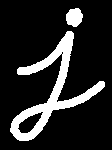

In [5]:
path_img_j = os.path.join(dir_images, "j.png")
img_j = cv2.imread(path_img_j)
cv2_imshow(img_j)

## 1. Erosion

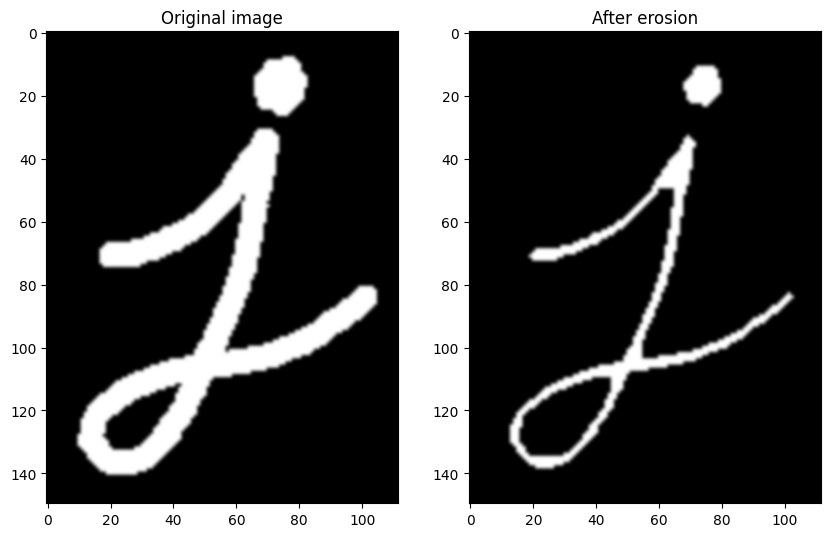

In [6]:
kernel = np.ones((5,5), np.uint8)
img_erosion = cv2.erode(img_j, kernel, iterations=1)
show2image(img_j, img_erosion, 'Original image', 'After erosion')

## 2. Dilation



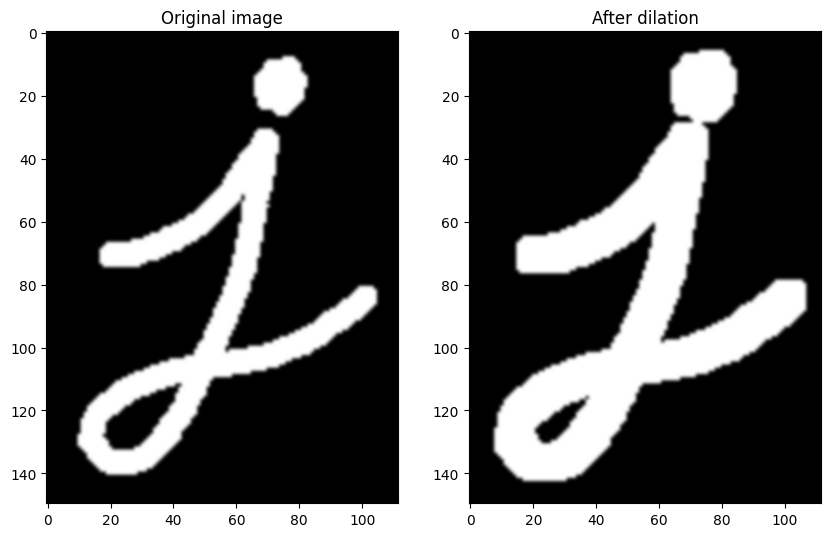

In [7]:
kernel = np.ones((5, 5), np.uint8)
img_dilation = cv2.dilate(img_j, kernel, iterations=1)
show2image(img_j, img_dilation, 'Original image', 'After dilation')

## 3. Opening


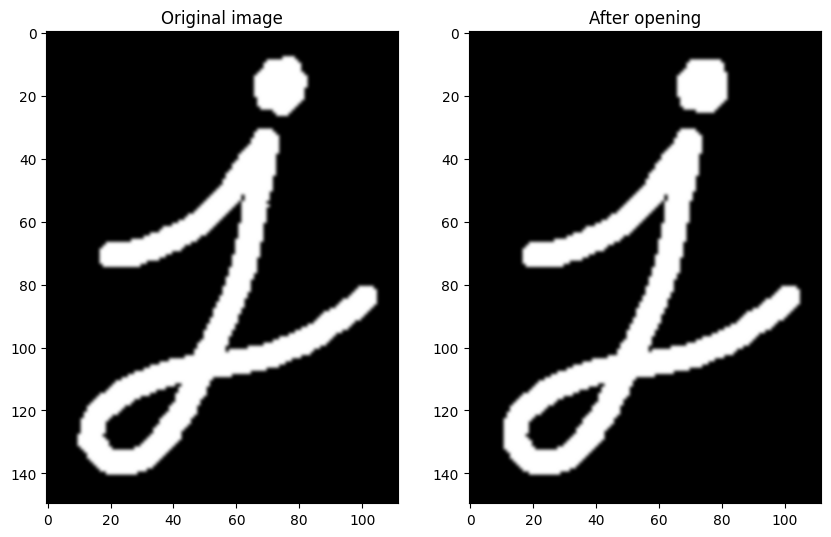

In [8]:
kernel = np.ones((5, 5), np.uint8)
# phép opening là phép co -> phép giãn
# img_opening = cv2.dilate(img_erosion, kernel, iterations=1)

# hoặc sử dụng hàm có sẵn của opencv
img_opening = cv2.morphologyEx(img_j, cv2.MORPH_OPEN, kernel, iterations=1)
show2image(img_j, img_opening, 'Original image', 'After opening')

## 4. Closing


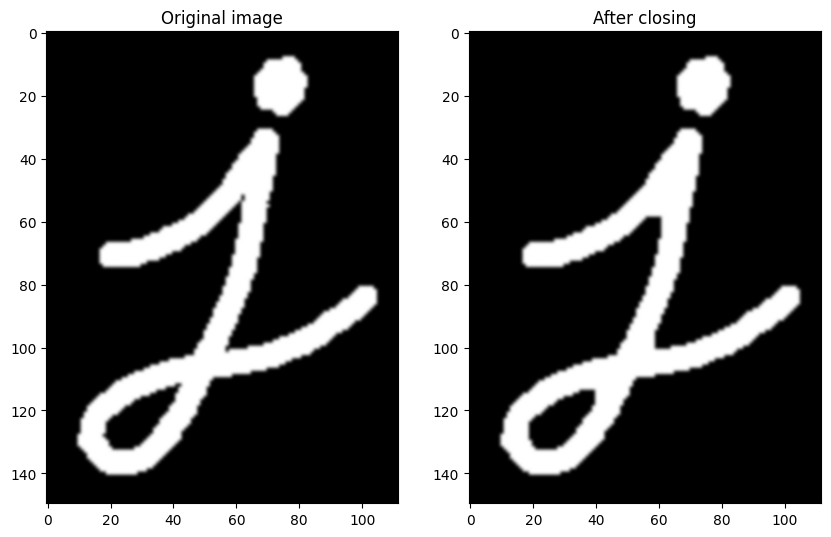

In [9]:
kernel = np.ones((5, 5), np.uint8)
# phép closing là phép giãn -> phép co
# img_closing = cv2.erode(img_dilation, kernel, iterations=1)

# hoặc sử dụng hàm có sẵn của opencv
img_closing = cv2.morphologyEx(img_j, cv2.MORPH_CLOSE, kernel, iterations=1)
show2image(img_j, img_closing, 'Original image', 'After closing')

# Yêu cầu 2: Áp dụng các phép biến đổi trên ảnh

## vantay: các nét vân tay rõ ràng

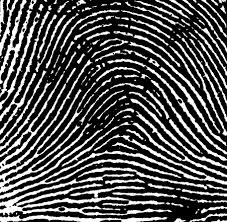

In [10]:
path_img_vantay = os.path.join(dir_images, 'vantay.jpg')
img_vantay = cv2.imread(path_img_vantay)
cv2_imshow(img_vantay)

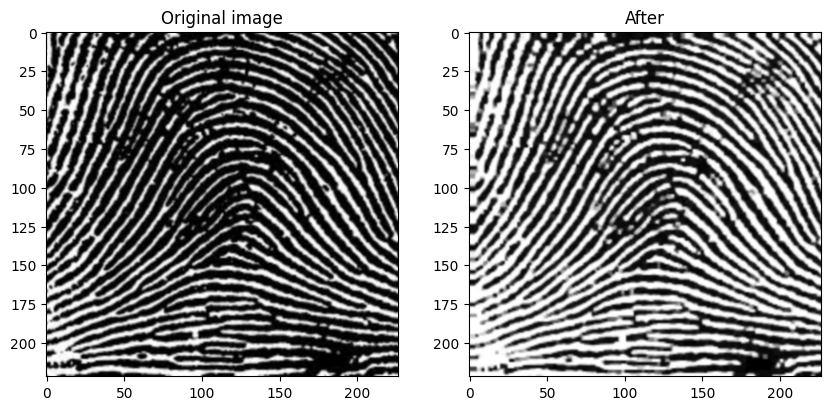

In [11]:
img_vantay_after = img_vantay.copy()
img_vantay_after = cv2.dilate(img_vantay_after, kernel=np.ones(shape=(3, 3), dtype=np.uint8), iterations=1)
img_vantay_after = cv2.morphologyEx(img_vantay_after, cv2.MORPH_OPEN, kernel=np.ones(shape=(2, 2), dtype=np.uint8))
img_vantay_after = cv2.erode(img_vantay_after, kernel=np.ones(shape=(2, 2), dtype=np.uint8), iterations=1)
img_vantay_after = cv2.morphologyEx(img_vantay_after, cv2.MORPH_OPEN, kernel=np.ones(shape=(2, 2), dtype=np.uint8))

show2image(img_vantay, img_vantay_after, 'Original image', 'After')

## coins: lấy được các đồng xu

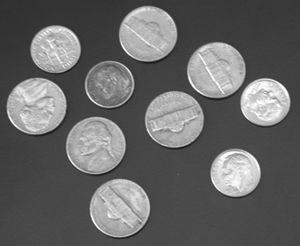

In [12]:
path_img_coins = os.path.join(dir_images, 'coins.png')
img_coins = cv2.imread(path_img_coins)
cv2_imshow(img_coins)

In [13]:
img_coins_gray = cv2.cvtColor(img_coins, cv2.COLOR_BGR2GRAY)

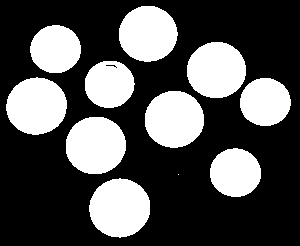

In [14]:
_, thresholded_coins = cv2.threshold(img_coins_gray, 90, 255, cv2.THRESH_BINARY)
cv2_imshow(thresholded_coins)

In [15]:
kernel = np.ones((3, 3), np.uint8)
closed_coins = cv2.morphologyEx(thresholded_coins, cv2.MORPH_CLOSE, kernel)
opened_coins = cv2.morphologyEx(closed_coins, cv2.MORPH_OPEN, kernel)

contours, _ = cv2.findContours(opened_coins, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
result_coins = cv2.drawContours(img_coins.copy(), contours, -1, (0, 255, 0), 2)

In [16]:
number_of_coins = len(contours)
print("Số đồng xu:", number_of_coins)

Số đồng xu: 10


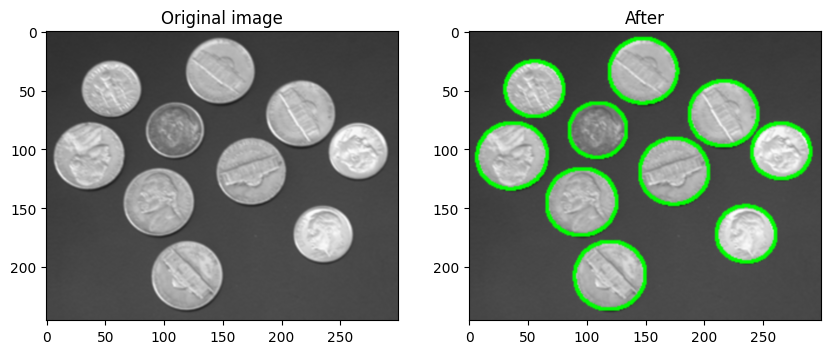

In [17]:
show2image(img_coins, result_coins, 'Original image', 'After')

## rice: lấy được các hạt gạo

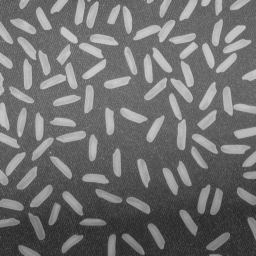

In [18]:
path_img_rice = os.path.join(dir_images, 'rice.png')
img_rice = cv2.imread(path_img_rice)
cv2_imshow(img_rice)

In [19]:
img_rice_gray = cv2.cvtColor(img_rice, cv2.COLOR_BGR2GRAY)

In [20]:
blurred = cv2.GaussianBlur(img_rice_gray, (5, 5), 0)

In [21]:
kernel_2 = np.ones((2, 2), np.uint8)
opened_gray =  cv2.morphologyEx(img_rice_gray, cv2.MORPH_OPEN, kernel_2)

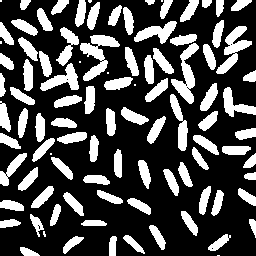

In [22]:
_, thresholded = cv2.threshold(opened_gray, 115, 255, cv2.THRESH_BINARY)
cv2_imshow(thresholded)

In [23]:
kernel = np.ones((3, 3), np.uint8)
rice_ero = cv2.erode(thresholded, kernel, iterations=1)

contours, _ = cv2.findContours(rice_ero, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
result_rice = cv2.drawContours(img_rice.copy(), contours, -1, (0, 255, 0), 1)

In [24]:
number_of_rice_grains = len(contours)
print("Số hạt gạo:", number_of_rice_grains)

Số hạt gạo: 100


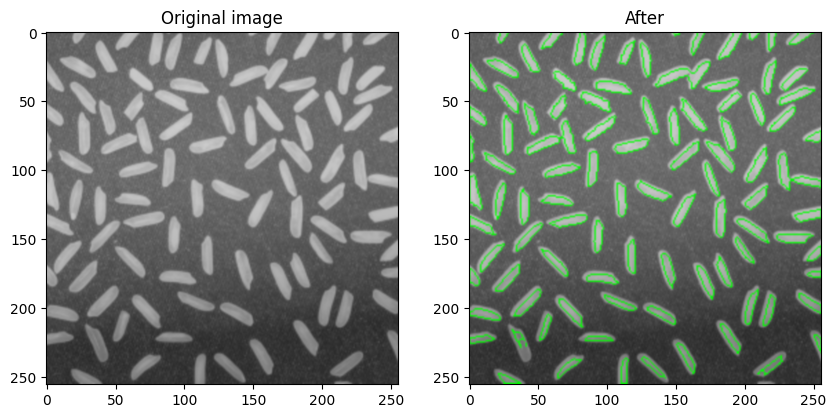

In [25]:
show2image(img_rice, result_rice, 'Original image', 'After')

# Yêu cầu 3: Xác định thành phần liên thông theo liên thông 4 cho ảnh

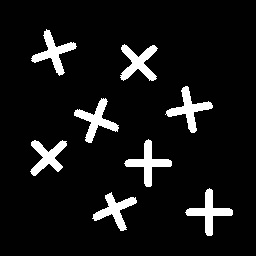

In [26]:
path_img_art8 = os.path.join(dir_images, 'art8.jpg')
img_art8 = cv2.imread(path_img_art8, cv2.IMREAD_GRAYSCALE)
cv2_imshow(img_art8)

In [27]:
_, binary_image = cv2.threshold(img_art8, 128, 255, cv2.THRESH_BINARY)

In [28]:
_, labels = cv2.connectedComponents(binary_image, connectivity=4)

In [29]:
label_hue = np.uint8(179 * labels / np.max(labels))
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue == 0] = 0

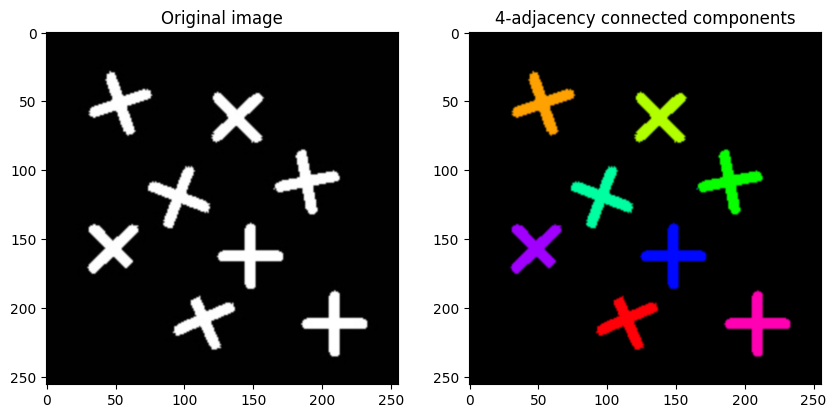

In [30]:
show2image(img_art8, labeled_img, 'Original image', '4-adjacency connected components')

# Yêu cầu 4: Xác định các vùng chứa kí tự trên biển số xe

## Process image

In [39]:
def process_image(img):
    img = cv2.resize(img, (140, 100))
    img_copy = img.copy()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    binary_image = cv2.threshold(img, img.mean() - 28, 255, cv2.THRESH_BINARY_INV)[1]
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image, connectivity=4)
    output_image = np.zeros((binary_image.shape[0], binary_image.shape[1], 3), dtype=np.uint8)

    dic = {i: (stats[i, cv2.CC_STAT_LEFT],
               stats[i, cv2.CC_STAT_TOP],
               stats[i, cv2.CC_STAT_WIDTH],
               stats[i, cv2.CC_STAT_HEIGHT])
    for i in range(0, num_labels)}

    def distance(point):
        xt = point[0] + point[2] / 2
        yt = point[1] + point[3] / 2
        xt = point[0]
        yt = point[1]
        return xt ** 2 + 10 * yt ** 2

    sorted_dict = sorted(dic.items(), key=lambda item: distance(item[1]))
    sorted_dict = {i[0]: i[1] for i in sorted_dict}

    for index, (key, value) in enumerate(sorted_dict.items()):
        x = value[0]
        y = value[1]
        w = value[2]
        h = value[3]
        if 40 > w > 5 and 8 < h < 43:
            output = img_copy.copy()
            cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
            black_img = np.zeros((img_copy.shape[0], img_copy.shape[1]), np.uint8)
            black_img[y:y + h, x:x + w] = binary_image[y:y + h, x:x + w]

            show2image(img, black_img, 'Original image', 'After')

## Bansoxe01

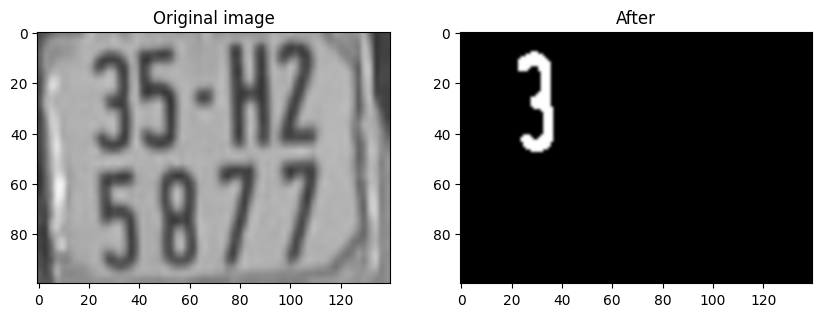

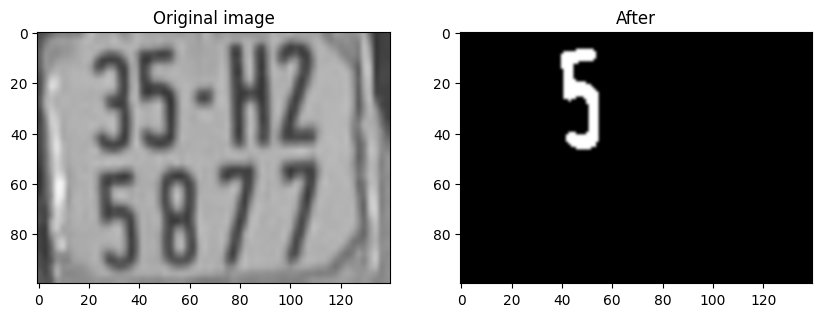

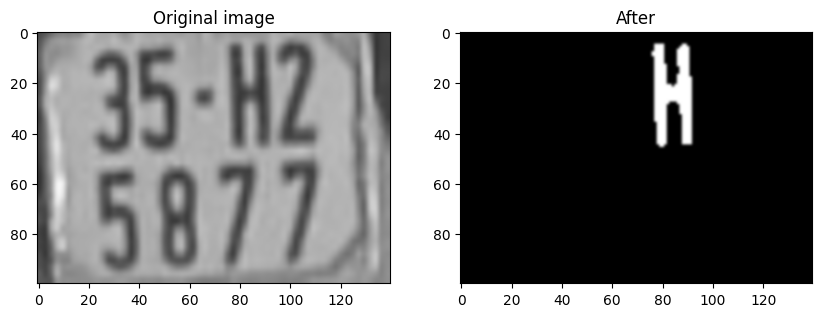

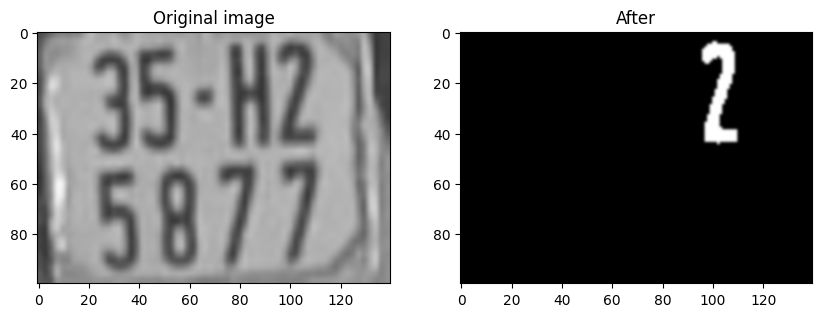

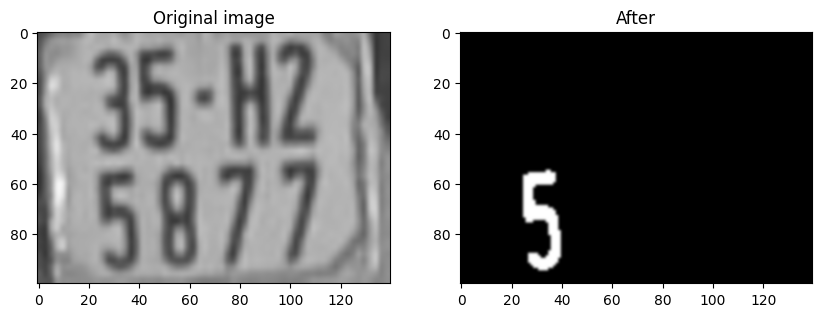

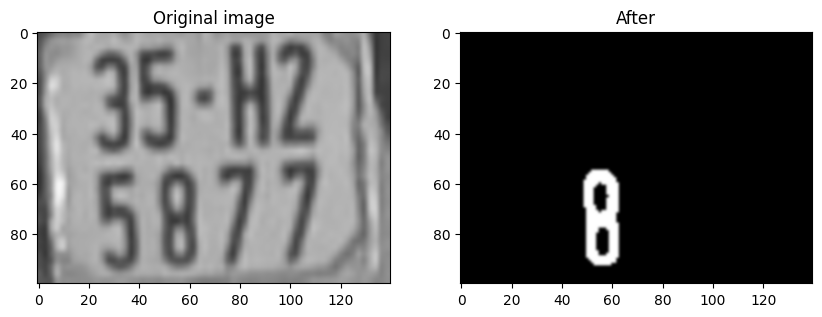

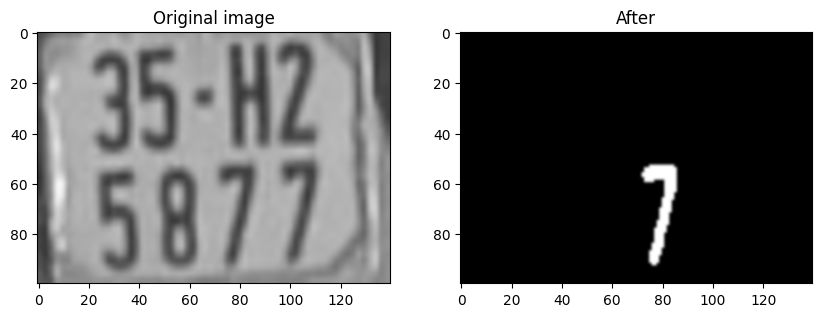

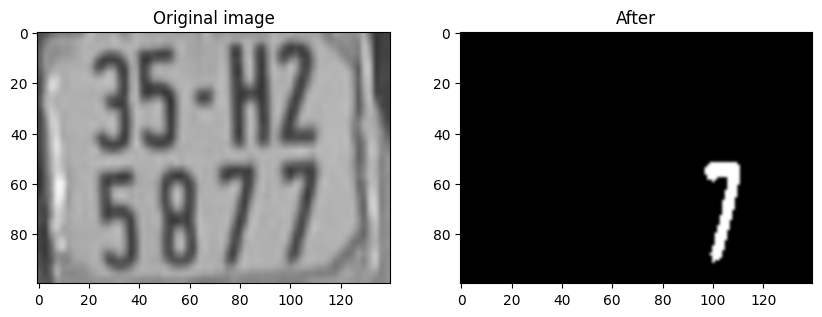

In [40]:
path_img_bsx01 = os.path.join(dir_images, 'Bansoxe01.jpg')
img_bsx01 = cv2.imread(path_img_bsx01)
process_image(img_bsx01)

## Bansoxe02

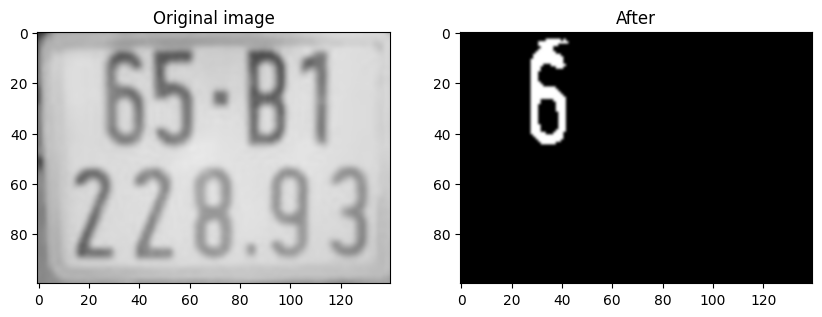

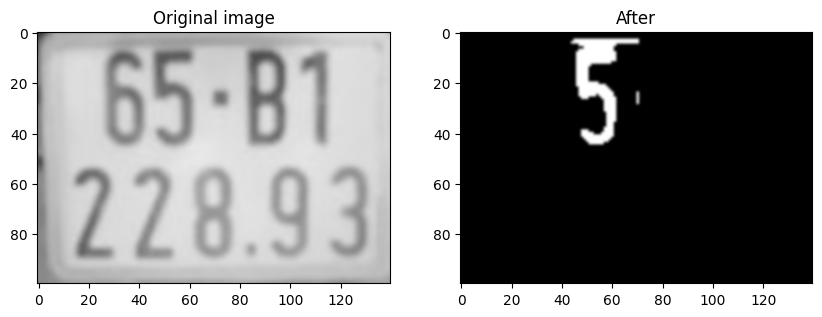

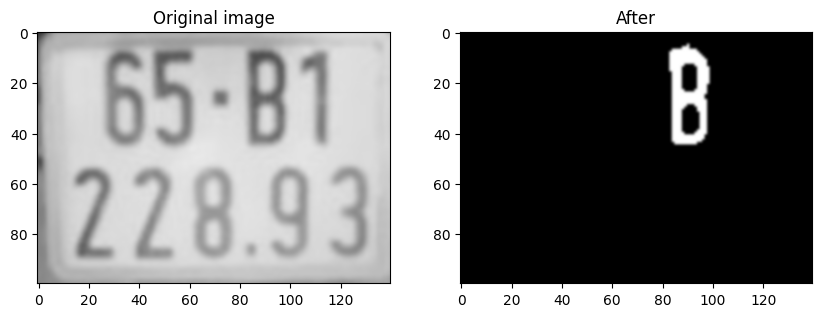

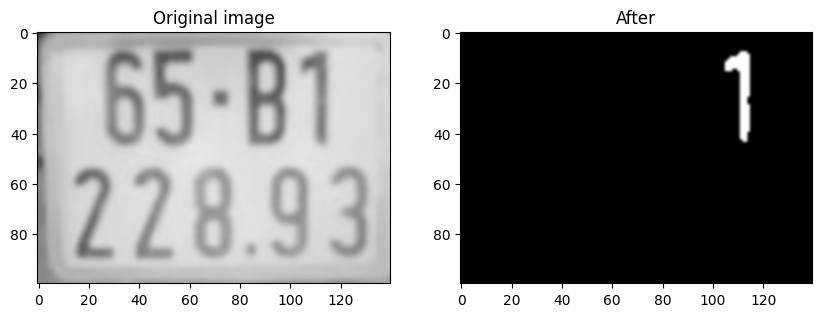

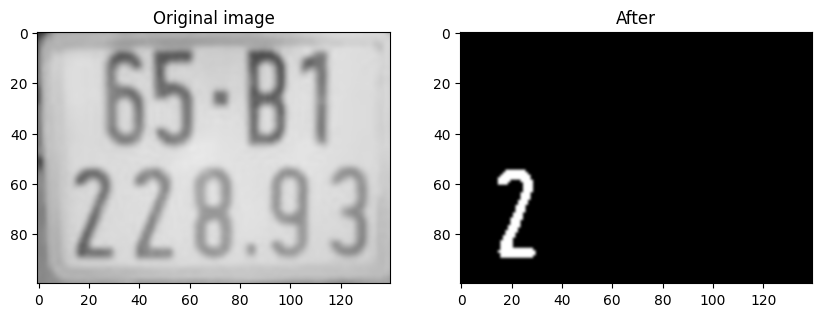

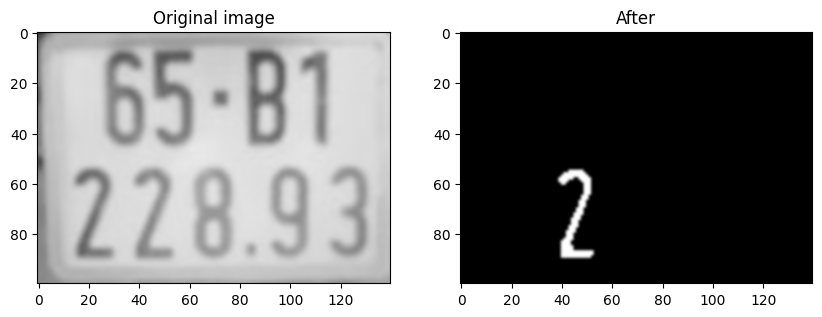

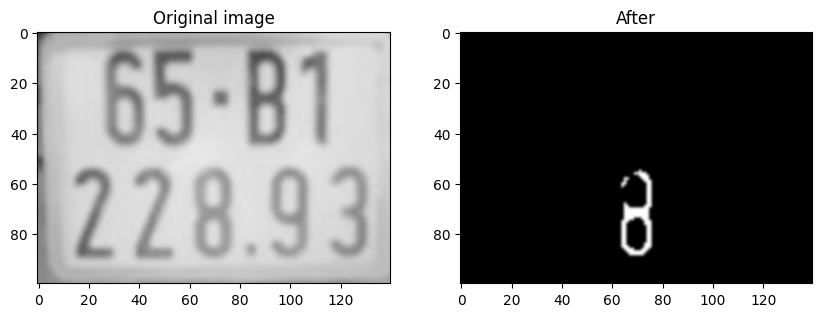

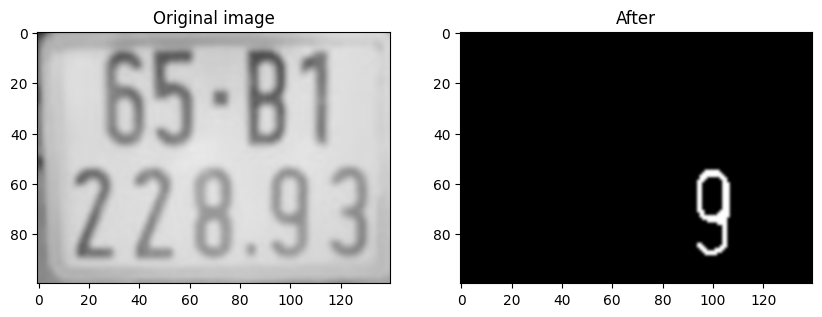

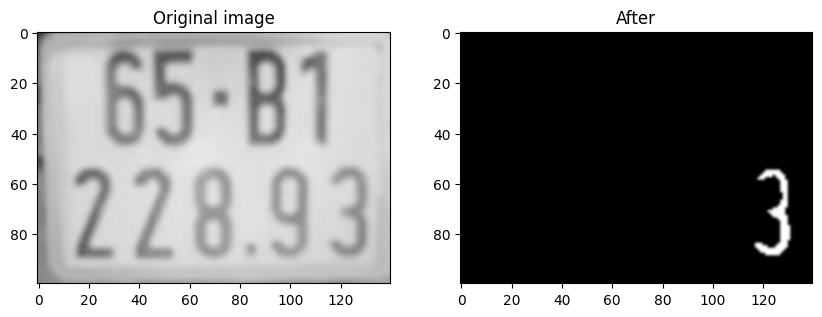

In [41]:
path_img_bsx02 = os.path.join(dir_images, 'Bansoxe02.jpg')
img_bsx02 = cv2.imread(path_img_bsx02)
process_image(img_bsx02)

## Bansoxe03

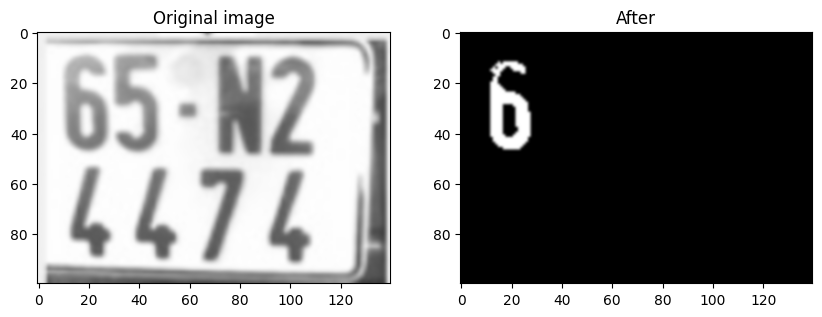

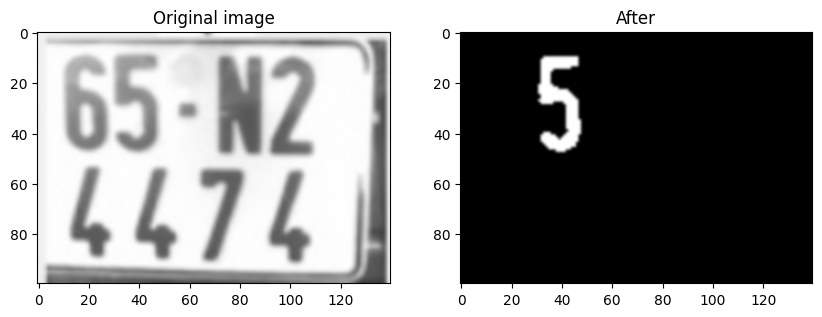

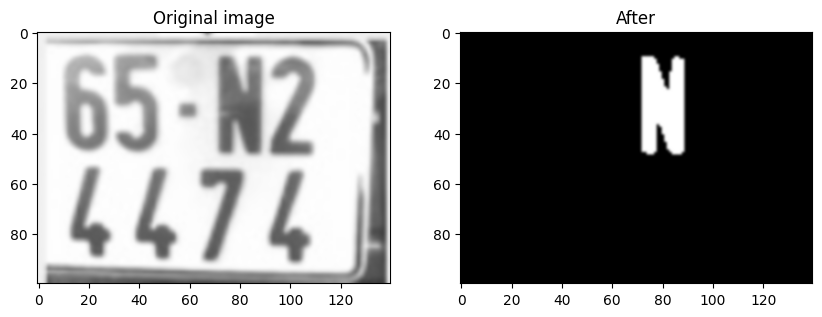

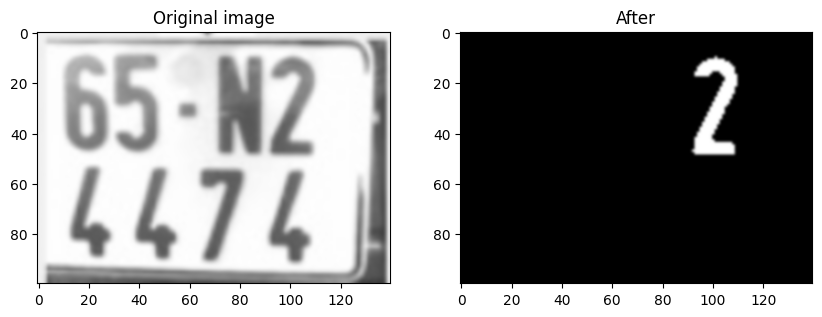

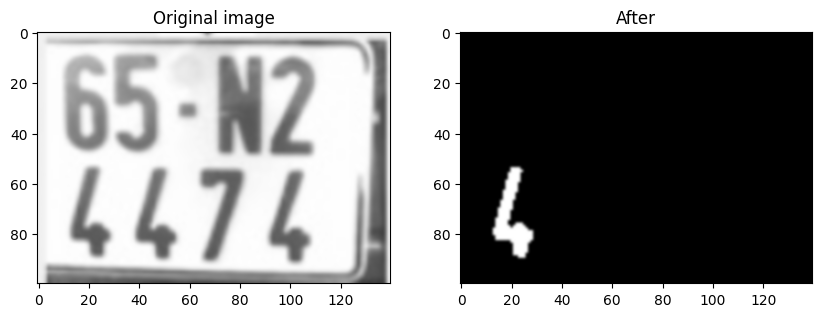

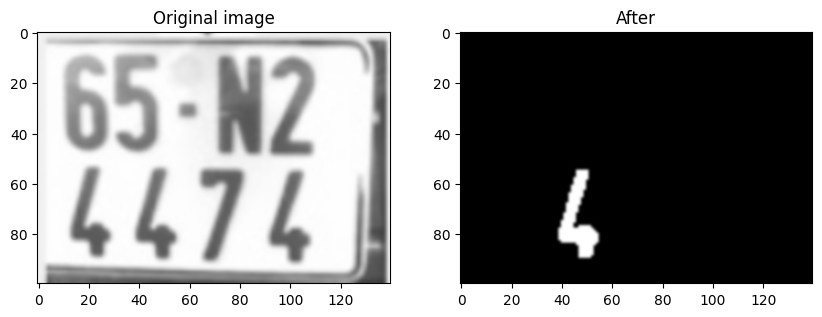

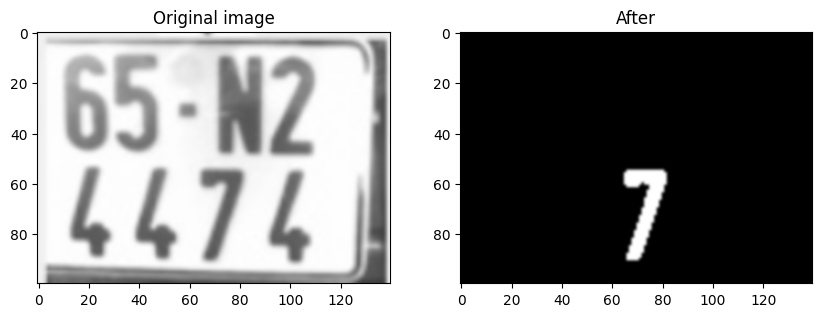

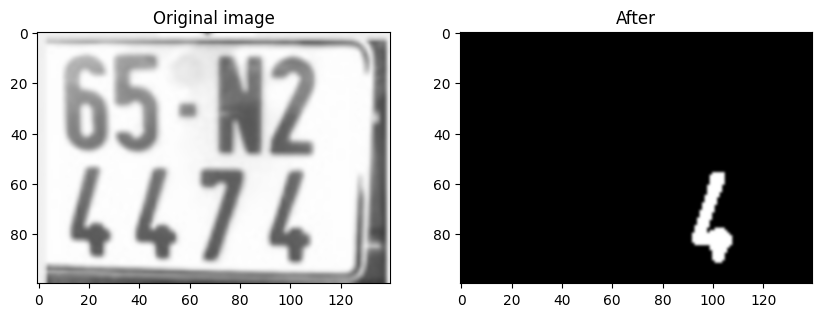

In [42]:
path_img_bsx03 = os.path.join(dir_images, 'Bansoxe03.jpg')
img_bsx03 = cv2.imread(path_img_bsx03)
process_image(img_bsx03)